<a href="https://colab.research.google.com/github/Malleshcr7/AI-ML-Projects/blob/main/Face_recognition_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install cmake
!pip install dlib
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=a20d38365944a4529ce62df8556ebd6dde40cc9d233308bf43354829d7a43aeb
  Stored in directory: /root/.cache/pip/wheels/8f/47/c8/f44c5aebb7507f7c8a2c0bd23151d732d0f0bd6884ad4ac635
Successfully built face-recognition-models


Saving malleshgeminigenaratedimage.png to malleshgeminigenaratedimage (2).png


Saving unnamed.png to unnamed (1).png


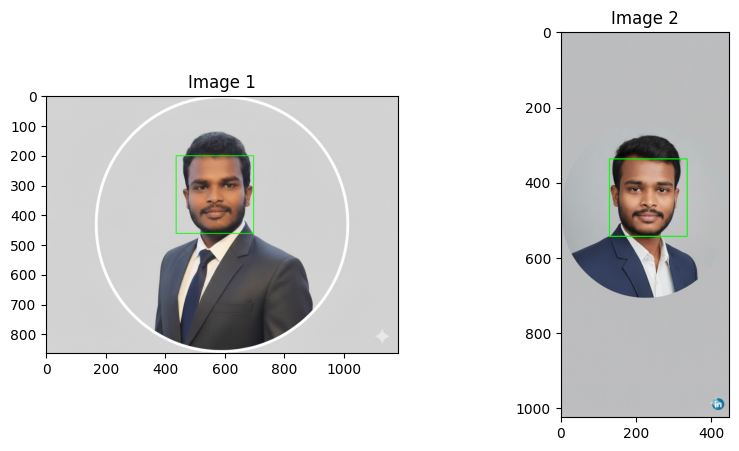

In [ ]:
import cv2
import numpy as np
from google.colab import files

# Upload first image
uploaded1 = files.upload()
img1 = cv2.imdecode(np.frombuffer(list(uploaded1.values())[0], np.uint8), cv2.IMREAD_COLOR)

# Upload second image
uploaded2 = files.upload()
img2 = cv2.imdecode(np.frombuffer(list(uploaded2.values())[0], np.uint8), cv2.IMREAD_COLOR)

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Load face cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces
faces1 = face_cascade.detectMultiScale(gray1, scaleFactor=1.1, minNeighbors=5)
faces2 = face_cascade.detectMultiScale(gray2, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around faces
for (x, y, w, h) in faces1:
    cv2.rectangle(img1, (x, y), (x+w, y+h), (0, 255, 0), 2)

for (x, y, w, h) in faces2:
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display images
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.show()

In [ ]:
import face_recognition
image1_path = list(uploaded1.keys())[0]
image2_path = list(uploaded2.keys())[0]
image1 = face_recognition.load_image_file(image1_path)
image2 = face_recognition.load_image_file(image2_path)
face_encodings1 = face_recognition.face_encodings(image1)
face_encodings2 = face_recognition.face_encodings(image2)
if len(face_encodings1) == 0:
    print("No face detected in the first image")
elif len(face_encodings2) == 0:
    print("No face detected in the second image")
else:
    results = face_recognition.compare_faces([face_encodings1[0]], face_encodings2[0])
    if results[0]:
        print("Result: Match")
    else:
        print("Result: Not Match")